# Chapter 3 - Backpropagation

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
paris_coords = np.array([
    [48.8575, 2.3514], #Center of Paris
    [48.8584, 2.2945], # Eiffel Tower
    [48.8530, 2.3499], #Notre Dame
    [48.8606,  2.3376], #Louvre
    [48.8606, 2.3522]  #Centre Pompidou
])

madrid_coords = np.array([
    [40.4167, -3.7033],   # Center of Madrid
    [40.4153, -3.6835],   # Retiro Park 
    [40.4180, -3.7143],   # Royal Palace 
    [40.4138, -3.6921],   # Prado Museum 
    [40.4169, -3.7033]   # Puerta del Sol 
])

berlin_coords = np.array([
    [52.5200, 13.4050], # Center of Berlin
    [52.5163, 13.3777],   # Brandenburg Gate 
    [52.5169, 13.4019],   # Museum Island 
    [52.5074, 13.3904],   # Checkpoint Charlie 
    [52.5251, 13.3694]   # Berlin Central Station 
])

In [3]:
# Set random seed for reproducibility
random_seed=52
torch.manual_seed(random_seed)
np.random.seed(random_seed)

In [4]:
# Combine data into one matrix X and labels y
X_raw = np.vstack([madrid_coords, paris_coords, berlin_coords]) 
y = np.array([0, 0, 0, 0, 0,  #  Madrid labels (0)
              1, 1, 1, 1, 1,  #  Paris labels (1)
              2, 2, 2, 2, 2]) #, # Berlin labels (2)

shuffle_idx = np.random.permutation(len(y))
shuffle_idx[0]=5
shuffle_idx[-1]=8 # A little manual shuffling to match example I showed earlier in the chapter. 
X = X_raw[shuffle_idx, 1:2]  # Extract longitude as column vector
y = y[shuffle_idx]

In [5]:
shuffle_idx

array([ 5,  4,  1, 10,  9,  3,  2, 14,  0, 13,  6,  7, 11, 12,  8])

In [6]:
X

array([[ 2.3514],
       [-3.7033],
       [-3.6835],
       [13.405 ],
       [ 2.3522],
       [-3.6921],
       [-3.7143],
       [13.3694],
       [-3.7033],
       [13.3904],
       [ 2.2945],
       [ 2.3499],
       [13.3777],
       [13.4019],
       [ 2.3376]])

In [7]:
X.shape, y.shape

((15, 1), (15,))

In [8]:
class TinyGPSModel(torch.nn.Module):
    def __init__(self, input_size=1, output_size=3):
        super(TinyGPSModel, self).__init__()
        self.output = torch.nn.Linear(input_size, output_size) 

    def forward(self, x):
        x = self.output(x)
        return x

In [9]:
# Initialize model, loss, and optimizer
model = TinyGPSModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

#Manually intialize model parameters
with torch.no_grad():
    model.output.weight[0,0]=1.0
    model.output.weight[1,0]=0.0
    model.output.weight[2,0]=-1.0
    model.output.bias[0]=0
    model.output.bias[1]=0
    model.output.bias[2]=0

for i in range(100):
    optimizer.zero_grad()
    outputs = model(torch.tensor(X[i%len(y)]).float())
    loss = criterion(outputs, torch.tensor(y[i%len(y)])) 

    loss.backward()  
    optimizer.step()
    
    with torch.no_grad():
        logits=model(torch.tensor(X, dtype=torch.float)) 
        accuracy=(torch.argmax(logits, dim=1)==torch.tensor(y)).sum().item()/len(y)
    print(f"Step {i+1}/{i}, Loss: {loss.item():.4f}, 'Accuracy: {accuracy:.4f}")

Step 1/0, Loss: 2.4506, 'Accuracy: 0.0000
Step 2/1, Loss: 7.0787, 'Accuracy: 0.0000
Step 3/2, Loss: 5.6116, 'Accuracy: 0.0000
Step 4/3, Loss: 15.7994, 'Accuracy: 0.6667
Step 5/4, Loss: 0.8210, 'Accuracy: 0.6667
Step 6/5, Loss: 0.5997, 'Accuracy: 0.6667
Step 7/6, Loss: 0.3995, 'Accuracy: 0.6667
Step 8/7, Loss: 2.2958, 'Accuracy: 0.3333
Step 9/8, Loss: 0.7949, 'Accuracy: 0.6667
Step 10/9, Loss: 0.0000, 'Accuracy: 0.6667
Step 11/10, Loss: 2.3406, 'Accuracy: 0.6667
Step 12/11, Loss: 1.9137, 'Accuracy: 0.6667
Step 13/12, Loss: 0.0007, 'Accuracy: 0.6667
Step 14/13, Loss: 0.0007, 'Accuracy: 0.6667
Step 15/14, Loss: 1.4998, 'Accuracy: 0.6667
Step 16/15, Loss: 1.1734, 'Accuracy: 0.6667
Step 17/16, Loss: 0.1637, 'Accuracy: 0.6667
Step 18/17, Loss: 0.1399, 'Accuracy: 0.6667
Step 19/18, Loss: 0.0760, 'Accuracy: 0.6667
Step 20/19, Loss: 1.0067, 'Accuracy: 0.6667
Step 21/20, Loss: 0.1123, 'Accuracy: 0.7333
Step 22/21, Loss: 0.0982, 'Accuracy: 1.0000
Step 23/22, Loss: 0.1678, 'Accuracy: 0.6667
Step 2

## Version with Instrumentation

In [10]:
BLUE='#21409a'
RED='#ed1c24'
GREEN='#00a14b'
CHILL_BROWN='#948979'

In [11]:
import matplotlib.colors as mcolors
def create_transparent_colormap(color='cyan', name='transparent_to_color'):
    # Convert color name to RGBA
    base_color = mcolors.to_rgba(color)
    
    # Create colormap: transparent (alpha=0) to full color (alpha=1)
    colors = [(base_color[0], base_color[1], base_color[2], 0),  # transparent
              (base_color[0], base_color[1], base_color[2], 1)]  # full color
    
    n_bins = 256
    cmap = mcolors.LinearSegmentedColormap.from_list(name, colors, N=n_bins)
    return cmap

# Create the colormap
transparent_cyan_cmap = create_transparent_colormap(BLUE)
transparent_yellow_cmap = create_transparent_colormap(RED)
transparent_green_cmap = create_transparent_colormap(GREEN)

cmaps=[transparent_cyan_cmap, transparent_yellow_cmap, transparent_green_cmap, transparent_cyan_cmap, transparent_yellow_cmap, transparent_green_cmap]
save_names=['_logits_1.png', '_logits_2.png', '_logits_3.png', '_yhat_1.png', '_yhat_2.png', '_yhat_3.png']

In [12]:
import os
save_dir='/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/3_backprop_2/graphics/training_heatmaps_1'
os.makedirs(save_dir, exist_ok=True)

In [13]:
min_long=-9.8
max_long=17.2
min_lat=36.15 
max_lat=54.7 
num_steps=256
heatmap_viz_logit_multiplier=8 #Makes things more winner take all for cleaner logit viz
heatmaps=[np.zeros((num_steps, num_steps)) for i in range(6)]


In [14]:
# # Set random seed for reproducibility
# random_seed=5
# torch.manual_seed(random_seed)
# np.random.seed(random_seed)

# Initialize model, loss, and optimizer
model = TinyGPSModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

with torch.no_grad():
    model.output.weight[0,0]=1.0
    model.output.weight[1,0]=0.0
    model.output.weight[2,0]=-1.0
    model.output.bias[0]=0
    model.output.bias[1]=0
    model.output.bias[2]=0

weights=[]
grads=[]
xs=[]
ys=[]
logitss=[]
yhats=[]
losses=[]
accuracies=[]

# Training loop
for i in range(101):
    xs.append(X[i%len(y)])
    ys.append(y[i%len(y)])
    weights.append(np.concatenate([model.output.weight.detach().numpy().ravel(), model.output.bias.detach().numpy().ravel()]))
    
    optimizer.zero_grad()
    
    outputs = model(torch.tensor(X[i%len(y)]).float())
    loss = criterion(outputs, torch.tensor(y[i%len(y)])) 

    logitss.append(outputs.detach().numpy())
    yhats.append(torch.nn.Softmax(0)(outputs.detach()).numpy())

    #Heatmaps
    heatmaps=[np.zeros((num_steps, num_steps)) for i in range(6)]
    for j, lat in enumerate(np.linspace(max_lat, min_lat, num_steps)):
        for k, long in enumerate(np.linspace(min_long, max_long, num_steps)):
            with torch.no_grad():
                logits=model(torch.tensor([long], dtype=torch.float)).detach()
                yhat=torch.nn.Softmax(0)(heatmap_viz_logit_multiplier*logits).numpy()
    
            for l in range(3):
                heatmaps[l][j, k]=logits.numpy()[l]
                heatmaps[l+3][j,k]=yhat[l]

    for l in range(6):
        plt.clf()
        plt.figure(frameon=False)
        ax = plt.Axes(plt.gcf(), [0., 0., 1., 1.])
        ax.set_axis_off()
        plt.gcf().add_axes(ax)
        plt.imshow(heatmaps[l],  cmap=cmaps[l]) #np.rot90(heatmaps[0])) #Wait and see if I need to rotate or transpose
        plt.savefig(save_dir+'/'+str(i)+save_names[l], bbox_inches='tight', pad_inches=0, dpi=300)
        plt.close()

    
    loss.backward()  # backpropagation
    grads.append(np.concatenate([model.output.weight.grad.detach().numpy().ravel(), model.output.bias.grad.detach().numpy().ravel()]))
    losses.append(loss.item())
    optimizer.step() #

    
    with torch.no_grad():
        logits=model(torch.tensor(X, dtype=torch.float)) 
        accuracy=(torch.argmax(logits, dim=1)==torch.tensor(y)).sum().item()/len(y)
    print(f"Step {i+1}/{i}, Loss: {loss.item():.4f}, 'Accuracy: {accuracy:.4f}")
    accuracies.append(accuracy)

weights=np.array(weights)
grads=np.array(grads)
xs=np.array(xs)
ys=np.array(ys)
logitss=np.array(logitss)
yhats=np.array(yhats)
losses=np.array(losses)
accuracies=np.array(accuracies)

Step 1/0, Loss: 2.4506, 'Accuracy: 0.0000
Step 2/1, Loss: 7.0787, 'Accuracy: 0.0000
Step 3/2, Loss: 5.6116, 'Accuracy: 0.0000
Step 4/3, Loss: 15.7994, 'Accuracy: 0.6667
Step 5/4, Loss: 0.8210, 'Accuracy: 0.6667
Step 6/5, Loss: 0.5997, 'Accuracy: 0.6667
Step 7/6, Loss: 0.3995, 'Accuracy: 0.6667
Step 8/7, Loss: 2.2958, 'Accuracy: 0.3333
Step 9/8, Loss: 0.7949, 'Accuracy: 0.6667
Step 10/9, Loss: 0.0000, 'Accuracy: 0.6667
Step 11/10, Loss: 2.3406, 'Accuracy: 0.6667
Step 12/11, Loss: 1.9137, 'Accuracy: 0.6667
Step 13/12, Loss: 0.0007, 'Accuracy: 0.6667
Step 14/13, Loss: 0.0007, 'Accuracy: 0.6667
Step 15/14, Loss: 1.4998, 'Accuracy: 0.6667
Step 16/15, Loss: 1.1734, 'Accuracy: 0.6667
Step 17/16, Loss: 0.1637, 'Accuracy: 0.6667
Step 18/17, Loss: 0.1399, 'Accuracy: 0.6667
Step 19/18, Loss: 0.0760, 'Accuracy: 0.6667
Step 20/19, Loss: 1.0067, 'Accuracy: 0.6667
Step 21/20, Loss: 0.1123, 'Accuracy: 0.7333
Step 22/21, Loss: 0.0982, 'Accuracy: 1.0000
Step 23/22, Loss: 0.1678, 'Accuracy: 0.6667
Step 2

<Figure size 640x480 with 0 Axes>

Best way to to get these into a table in in Design?

In [15]:
import pandas as pd
fn='/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/3_backprop_2/training_run_2.csv'
steps_to_show=[0, 1, 2, 3, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]

In [16]:
# df=pd.DataFrame(weights, columns=['w1', 'w2','w3','b1','b2','b3']).round(3)

In [17]:
# xs

In [18]:
df=pd.DataFrame([xs[steps_to_show, 0], 
                 weights[steps_to_show, 0], 
                 weights[steps_to_show, 1], 
                 weights[steps_to_show, 2],
                 grads[steps_to_show, 0], 
                 grads[steps_to_show, 1], 
                 grads[steps_to_show, 2],
                 weights[steps_to_show, 3], 
                 weights[steps_to_show, 4], 
                 weights[steps_to_show, 5],
                 grads[steps_to_show, 3], 
                 grads[steps_to_show, 4], 
                 grads[steps_to_show, 5],
                 logitss[steps_to_show, 0],
                 logitss[steps_to_show, 1],
                 logitss[steps_to_show, 2],                 
                 yhats[steps_to_show, 0],
                 yhats[steps_to_show, 1],
                 yhats[steps_to_show, 2],
                 ys[steps_to_show],
                 losses[steps_to_show],
                 accuracies[steps_to_show],
                 ], 
                 columns=steps_to_show
                 )

In [19]:
df.round(3)

,0,1,2,3,10,20,30,40,50,60,70,80,90,99
0,2.351,-3.703,-3.684,13.405,2.294,-3.692,2.351,2.294,-3.692,2.351,2.294,-3.692,2.351,13.390
1,1.000,0.894,0.709,0.525,-0.416,-0.518,-0.597,-0.671,-0.717,-0.755,-0.797,-0.827,-0.853,-0.884
2,0.000,0.107,0.111,0.117,-0.268,0.173,0.130,0.154,0.241,0.206,0.205,0.269,0.253,0.251
3,-1.000,-1.001,-0.819,-0.642,0.684,0.345,0.467,0.517,0.476,0.549,0.593,0.558,0.600,0.633
4,2.129,3.700,3.670,13.349,0.169,0.392,0.145,0.119,0.167,0.087,0.079,0.114,0.060,0.000
5,-2.149,-0.063,-0.127,0.056,-2.074,-0.288,-1.407,-1.341,-0.141,-1.154,-1.132,-0.103,-0.946,0.298
6,0.019,-3.637,-3.543,-13.405,1.904,-0.104,1.262,1.223,-0.026,1.068,1.053,-0.011,0.886,-0.298
7,0.000,-0.045,0.005,0.054,0.060,0.052,0.058,0.068,0.061,0.062,0.068,0.063,0.063,0.067
8,0.000,0.046,0.045,0.043,-0.015,0.163,0.223,0.257,0.375,0.430,0.461,0.559,0.607,0.633
9,0.000,-0.000,-0.050,-0.098,-0.044,-0.215,-0.281,-0.326,-0.436,-0.492,-0.529,-0.622,-0.670,-0.701


In [20]:
df.round(3).to_csv(fn)

---

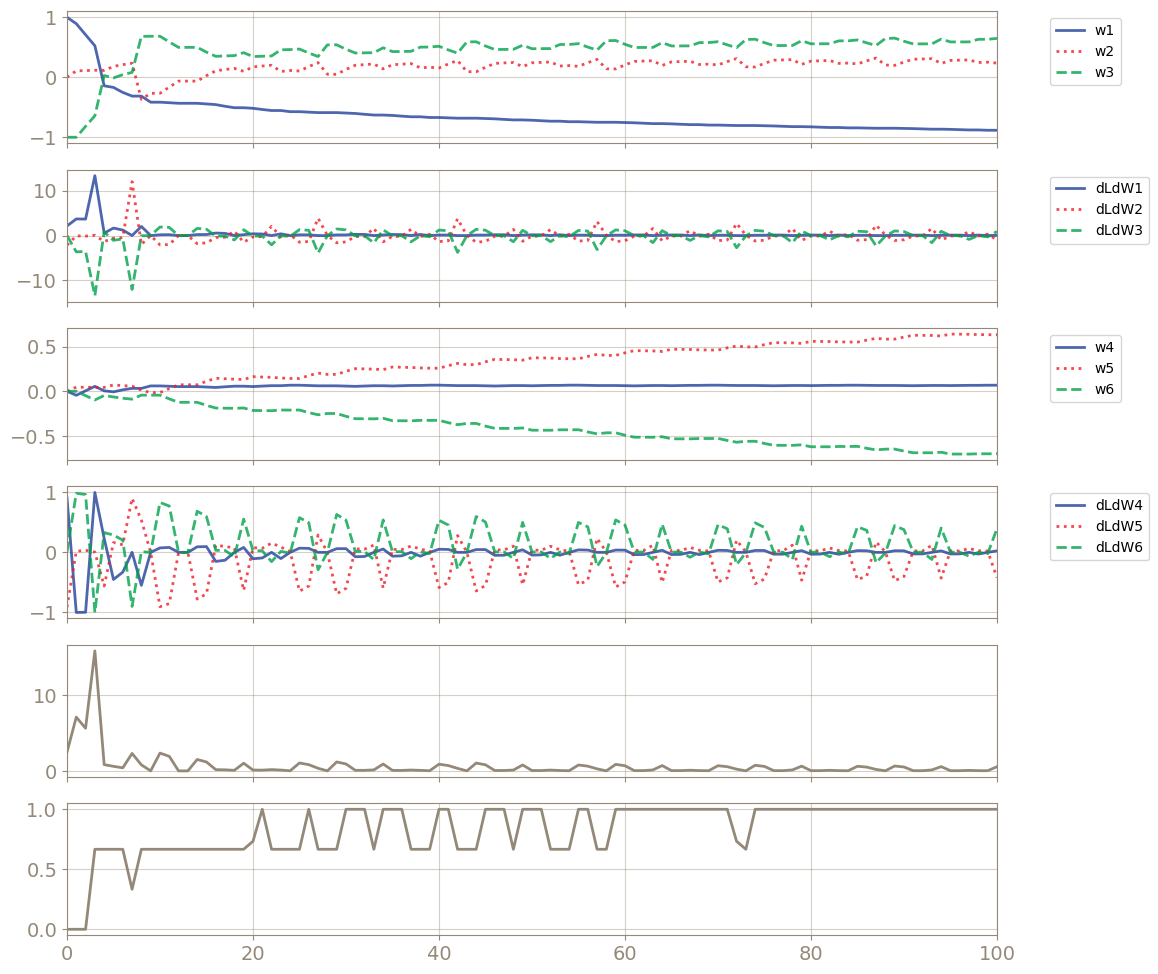

In [21]:
fig=plt.figure(0, (12, 12))
fig.add_subplot(6, 1, 1)
plt.plot(weights[:,0], linewidth=2, color=BLUE, alpha=0.8, label='w1');
plt.plot(weights[:,1], linewidth=2, color=RED, linestyle=':', alpha=0.8, label='w2');
plt.plot(weights[:,2], linewidth=2, color=GREEN, linestyle='--', alpha=0.8, label='w3');
plt.tick_params(labelbottom=False, colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.add_subplot(6, 1, 2)
plt.plot(grads[:,0], linewidth=2, color=BLUE, alpha=0.8, label='dLdW1');
plt.plot(grads[:,1], linewidth=2, color=RED, linestyle=':', alpha=0.8, label='dLdW2');
plt.plot(grads[:,2], linewidth=2, color=GREEN, linestyle='--', alpha=0.8, label='dLdW3');
plt.tick_params(labelbottom=False, colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.add_subplot(6, 1, 3)
plt.plot(weights[:,3], linewidth=2, color=BLUE, alpha=0.8, label='w4');
plt.plot(weights[:,4], linewidth=2, color=RED, linestyle=':', alpha=0.8, label='w5');
plt.plot(weights[:,5], linewidth=2, color=GREEN, linestyle='--', alpha=0.8, label='w6');
plt.tick_params(labelbottom=False, colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.add_subplot(6, 1, 4)
plt.plot(grads[:,3], linewidth=2, color=BLUE, alpha=0.8, label='dLdW4');
plt.plot(grads[:,4], linewidth=2, color=RED, linestyle=':', alpha=0.8, label='dLdW5');
plt.plot(grads[:,5], linewidth=2, color=GREEN, linestyle='--', alpha=0.8, label='dLdW6');
plt.tick_params(labelbottom=False, colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

fig.add_subplot(6, 1, 5)
plt.plot(losses, linewidth=2, color=CHILL_BROWN)
plt.tick_params(labelbottom=False, colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])

fig.add_subplot(6, 1, 6)
plt.plot(accuracies, linewidth=2, color=CHILL_BROWN)
plt.tick_params(colors=CHILL_BROWN, labelsize=14)
plt.grid(True, color=CHILL_BROWN, alpha=0.4)
plt.gca().spines['top'].set_color(CHILL_BROWN)
plt.gca().spines['bottom'].set_color(CHILL_BROWN)
plt.gca().spines['left'].set_color(CHILL_BROWN)
plt.gca().spines['right'].set_color(CHILL_BROWN)
plt.xlim([0, 100])

plt.savefig('/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/3_backprop_2/graphics/training_plots_1.svg')

Ok, now I want to go through and render little linear deals for each step as svgs in the right colors. 

In [65]:
# xs=np.linspace(-14, 14, 10)
# min_long=-9.8
# max_long=17.2
xs=np.linspace(min_long, max_long, 10)
import os
save_dir='/Users/stephen/Stephencwelch Dropbox/welch_labs/ai_book/3_backprop_2/graphics/line_plots/'
os.makedirs(save_dir, exist_ok=True)

In [66]:
xs

array([-9.8, -6.8, -3.8, -0.8,  2.2,  5.2,  8.2, 11.2, 14.2, 17.2])

<Figure size 640x480 with 0 Axes>

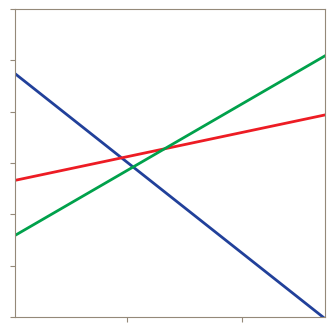

In [67]:
for step_num in range(101): 
    plt.clf()
    fig=plt.figure(0, (4, 4))
    ax=fig.add_subplot(111)
    plt.plot(xs, weights[step_num, 0]*xs+weights[step_num, 3], linewidth=2, color=BLUE)
    plt.plot(xs, weights[step_num, 1]*xs+weights[step_num, 4], linewidth=2, color=RED)
    plt.plot(xs, weights[step_num, 2]*xs+weights[step_num, 5], linewidth=2, color=GREEN)
    plt.xlim([min_long, max_long]); plt.ylim(-15, 15)

    # plt.tick_params(labelbottom=False, labelleft=False, colors=CHILL_BROWN, labelsize=14)
    plt.gca().spines['top'].set_color(CHILL_BROWN)
    plt.gca().spines['bottom'].set_color(CHILL_BROWN)
    plt.gca().spines['left'].set_color(CHILL_BROWN)
    plt.gca().spines['right'].set_color(CHILL_BROWN)

    # plt.axis('off');
    plt.savefig(save_dir + str(step_num).zfill(3)+'.svg')


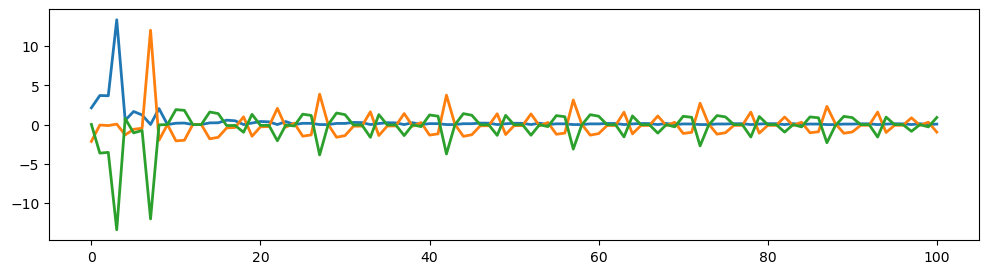

In [22]:
fig=plt.figure(0, (12, 3))
plt.plot(grads[:,:3], linewidth=2);

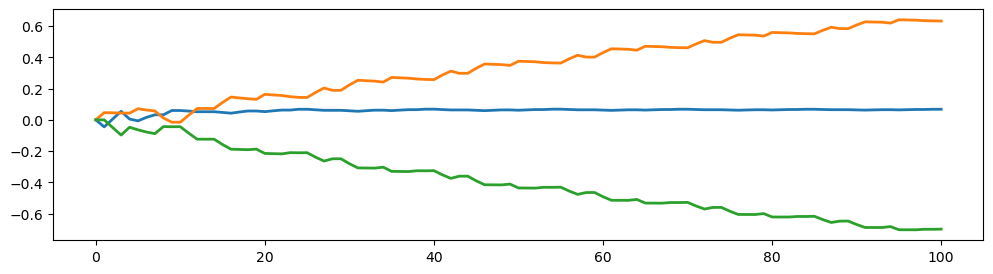

In [23]:
fig=plt.figure(0, (12, 3))
plt.plot(weights[:,3:], linewidth=2);

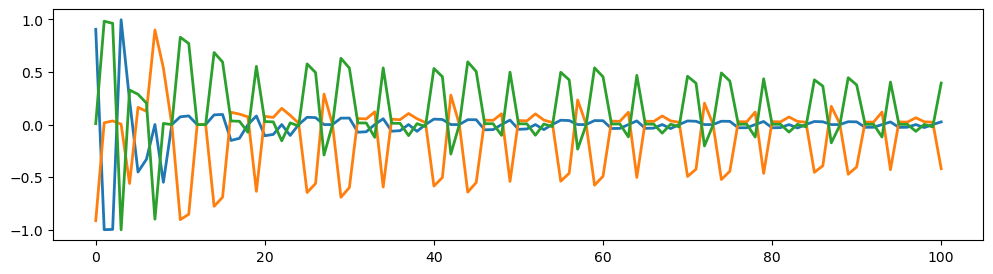

In [24]:
fig=plt.figure(0, (12, 3))
plt.plot(grads[:,3:], linewidth=2);

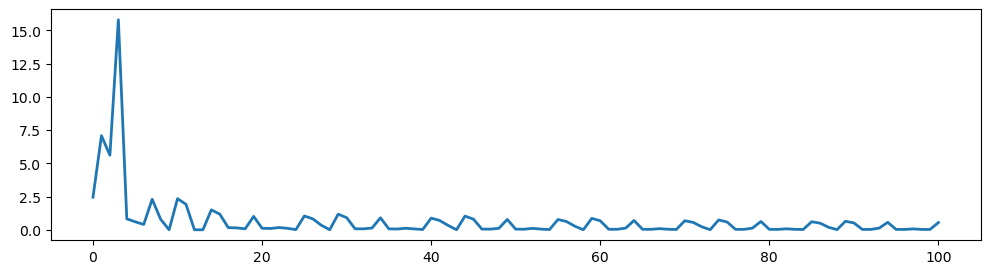

In [25]:
fig=plt.figure(0, (12, 3))
plt.plot(losses, linewidth=2)

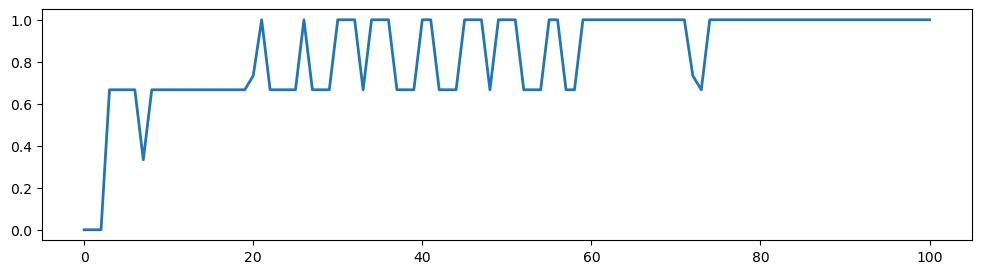

In [26]:
fig=plt.figure(0, (12, 3))
plt.plot(accuracies, linewidth=2)

In [27]:
# plt.plot(yhats);

In [28]:
# plt.plot(logitss);

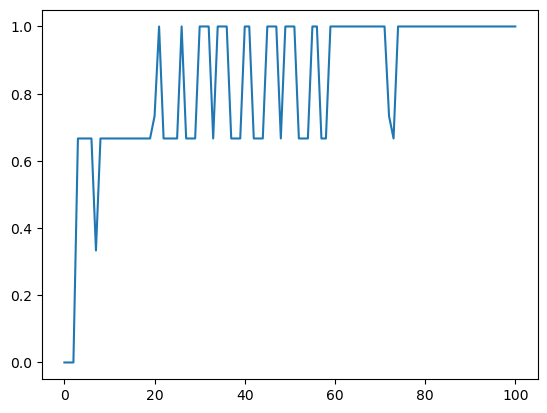

In [29]:
plt.plot(accuracies)

In [30]:
xs[:,1]

IndexError: index 1 is out of bounds for axis 1 with size 1